## 导包

In [1]:
#导入爬虫所需要的库
import requests
from requests.packages import urllib3
#数据处理所需要的库
import pandas as pd
import numpy as np
#数据可视化所需要的库
import matplotlib.pyplot as plt
#svr回归预测所需要的库
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn import datasets
from sklearn.svm import SVR
#消除警示
import warnings
warnings.filterwarnings('ignore')

## 爬虫请求数据

https://data.stats.gov.cn/easyquery.htm?cn=C01&zb=A0301&sj=2021

In [4]:
urllib3.disable_warnings()#忽略不安全
url = 'https://data.stats.gov.cn/easyquery.htm?cn=C01&zb=A0301&sj=2021'
StatusUrl = "https://data.stats.gov.cn/easyquery.htm?m=QueryData&dbcode=hgnd&rowcode=zb&colcode=sj&wds=%5B%5D&dfwds=%5B%7B%22wdcode%22%3A%22sj%22%2C%22valuecode%22%3A%22LAST20%22%7D%5D&k1=1670841757932"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36",
    # 防盗链
    "Referer": url
}
resp = requests.get(StatusUrl, headers=headers, verify=False)

## 数据预处理

分割字符放进列表

In [5]:
# 初始为4，年份为2021年，中间间隔4个字段，8的时候为2020年。一共有20个年份，初始为4，末尾为80
# 因为有5个大的字段
# print(resp.text)
ls = []
for j in range(4, 401, 4):
    populations = resp.text.split('{')[j].split(',')[0][7:]
    ls.append(populations)
print(f'年末总人口(万人)为{ls[0:20]}')
print(f'男性人口(万人)为{ls[20:40]}')
print(f'女性人口(万人)为{ls[40:60]}')
print(f'城镇人口(万人)为{ls[60:80]}')
print(f'乡村人口(万人)为{ls[80:]}')

年末总人口(万人)为['141260.0', '141212.0', '141008.0', '140541.0', '140011.0', '139232.0', '138326.0', '137646.0', '136726.0', '135922.0', '134916.0', '134091.0', '133450.0', '132802.0', '132129.0', '131448.0', '130756.0', '129988.0', '129227.0', '128453.0']
男性人口(万人)为['72311.0', '72357.0', '72039.0', '71863.8714257048', '71650.0', '71307.0', '70857.0', '70522.0', '70063.0', '69660.0', '69161.0', '68748.0', '68647.0', '68357.0', '68048.0', '67728.0', '67375.0', '66976.0', '66556.0', '66115.0']
女性人口(万人)为['68949.0', '68855.0', '68969.0', '68677.1285742951', '68361.0', '67925.0', '67469.0', '67124.0', '66663.0', '66262.0', '65755.0', '65343.0', '64803.0', '64445.0', '64081.0', '63720.0', '63381.0', '63012.0', '62671.0', '62338.0']
城镇人口(万人)为['91425.0', '90220.0', '88426.1167999999', '86432.7149999999', '84342.6264', '81924.1088', '79302.2958', '76737.645', '74501.9974', '72174.582', '69926.9628', '66978.0', '64512.0', '62403.0', '60633.0', '58288.0', '56212.0', '54283.0', '52376.0', '50212.0']
乡村人口

## 写入csv

In [6]:
header_year = ['2002年', '2003年', '2004年', '2005年', '2006年', '2007年', '2008年', '2009年', '2010年', '2011年', \
          '2012年', '2013年', '2014年', '2015年', '2016年', '2017年', '2018年', '2019年', '2020年', '2021年']
header = ['年末总人口(万人)', '男性人口(万人)', '女性人口(万人)', '城镇人口(万人)', '乡村人口(万人)']
ls1, ls2, ls3, ls4, ls5 = list(), list(), list(), list(), list()


ls1 = ls[0:20];ls2 = ls[20:40];ls3 = ls[40:60];ls4 = ls[60:80];ls5 = ls[80:]
df = pd.DataFrame({'年末总人口(万人)':ls1[::-1], '男性人口(万人)':ls2[::-1], '女性人口(万人)':ls3[::-1], '城镇人口(万人)':ls4[::-1], '乡村人口(万人)':ls5[::-1]}, \
                  index = header_year)
df.to_csv('./data.csv')

## 查看是否导入成功

In [7]:
r= pd.read_csv('data.csv')
print(r.head())

  Unnamed: 0  年末总人口(万人)  男性人口(万人)  女性人口(万人)  城镇人口(万人)  乡村人口(万人)
0      2002年   128453.0   66115.0   62338.0   50212.0   78241.0
1      2003年   129227.0   66556.0   62671.0   52376.0   76851.0
2      2004年   129988.0   66976.0   63012.0   54283.0   75705.0
3      2005年   130756.0   67375.0   63381.0   56212.0   74544.0
4      2006年   131448.0   67728.0   63720.0   58288.0   73160.0


## 数据处理

In [14]:
data = pd.read_csv("data.csv").loc[:,"年末总人口(万人)":"乡村人口(万人)"]
# data = data.drop(0)
# print(data)
Data=[]
# print(np.array(data))
Data.append(np.array(data))
# # print(Data)
total_population = [i[0] for i in Data[0]]
man_populantion = [i[1] for i in Data[0]]
woman_populantion = [i[2] for i in Data[0]]
town_populantion = [i[3] for i in Data[0]]
village_populantion = [i[4] for i in Data[0]]
print(total_population )
print(man_populantion)
print(woman_populantion)
print(town_populantion)
print(village_populantion)

[128453.0, 129227.0, 129988.0, 130756.0, 131448.0, 132129.0, 132802.0, 133450.0, 134091.0, 134916.0, 135922.0, 136726.0, 137646.0, 138326.0, 139232.0, 140011.0, 140541.0, 141008.0, 141212.0, 141260.0]
[66115.0, 66556.0, 66976.0, 67375.0, 67728.0, 68048.0, 68357.0, 68647.0, 68748.0, 69161.0, 69660.0, 70063.0, 70522.0, 70857.0, 71307.0, 71650.0, 71863.8714257048, 72039.0, 72357.0, 72311.0]
[62338.0, 62671.0, 63012.0, 63381.0, 63720.0, 64081.0, 64445.0, 64803.0, 65343.0, 65755.0, 66262.0, 66663.0, 67124.0, 67469.0, 67925.0, 68361.0, 68677.1285742951, 68969.0, 68855.0, 68949.0]
[50212.0, 52376.0, 54283.0, 56212.0, 58288.0, 60633.0, 62403.0, 64512.0, 66978.0, 69926.9628, 72174.582, 74501.9974, 76737.645, 79302.2958, 81924.1088, 84342.6264, 86432.7149999999, 88426.1167999999, 90220.0, 91425.0]
[78241.0, 76851.0, 75705.0, 74544.0, 73160.0, 71496.0, 70399.0, 68938.0, 67113.0, 64989.0372, 63747.418, 62224.0026, 60908.355, 59023.7042, 57307.8912, 55668.3736, 54108.285, 52581.8832, 50992.0, 49835

## 数据可视化

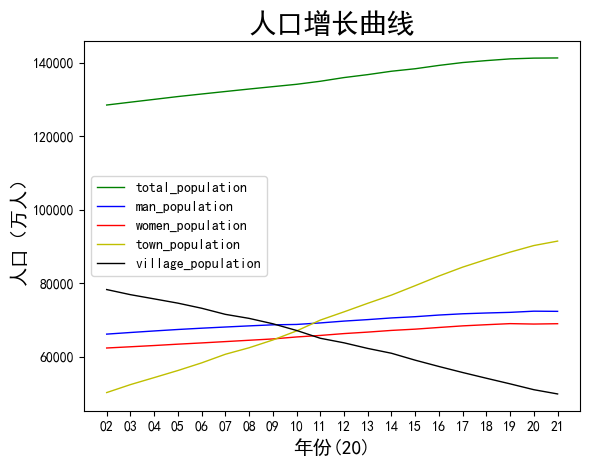

In [9]:
header_year = ['02', '03', '04', '05', '06', '07', '08', '09', '10', '11', \
          '12', '13', '14', '15', '16', '17', '18', '19', '20', '21']
plt.plot(header_year,total_population,linewidth=1,c='green',label='total_population')
plt.plot(header_year,man_populantion,linewidth=1,c='b',label='man_population')
plt.plot(header_year,woman_populantion,linewidth=1,c='r',label='women_population')
plt.plot(header_year,town_populantion,linewidth=1,c='y',label='town_population')
plt.plot(header_year,village_populantion,linewidth=1,c='k',label='village_population')
plt.rcParams['font.sans-serif'] = ['SimHei']
#设置图标标题，并在坐标轴上添加标签
plt.title('人口增长曲线',fontsize=20)
plt.xlabel('年份(20)',fontsize=14)
plt.ylabel('人口（万人）',fontsize=14)
plt.legend()#t添加图例
plt.show()

#  仅展示两类

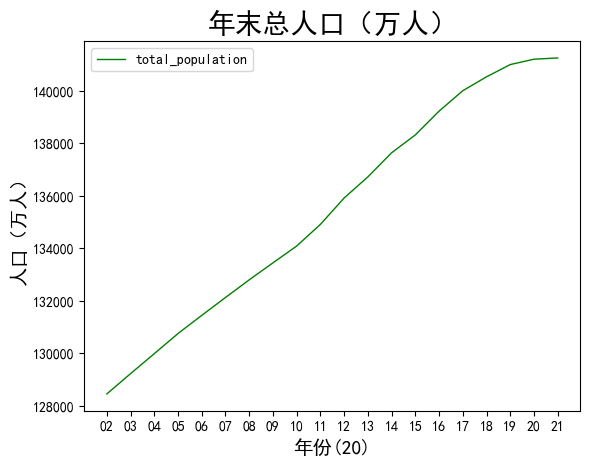

In [12]:
plt.plot(header_year,total_population,linewidth=1,c='green',label='total_population')
plt.rcParams['font.sans-serif'] = ['SimHei']
#设置图标标题，并在坐标轴上添加标签
plt.title('年末总人口（万人）',fontsize=20)
plt.xlabel('年份(20)',fontsize=14)
plt.ylabel('人口（万人）',fontsize=14)
plt.legend()#t添加图例
plt.show()

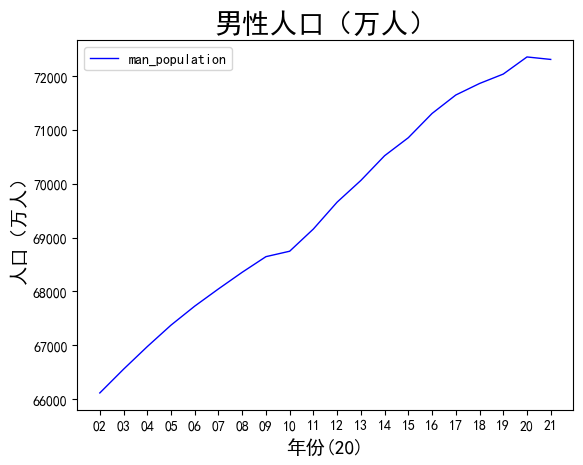

In [13]:
plt.plot(header_year,man_populantion,linewidth=1,c='b',label='man_population')
plt.rcParams['font.sans-serif'] = ['SimHei']
#设置图标标题，并在坐标轴上添加标签
plt.title('男性人口（万人）',fontsize=20)
plt.xlabel('年份(20)',fontsize=14)
plt.ylabel('人口（万人）',fontsize=14)
plt.legend()#t添加图例
plt.show()

## SVR回归预测

In [18]:
years_since_02 = np.array([i for i in range(len(total_population))]).reshape(-1, 1)
data = [];pred=[]
total = np.array(total_population).reshape(-1,1);data.append(total)
man = np.array(man_populantion).reshape(-1,1);data.append(man)
woman = np.array(woman_populantion).reshape(-1,1);data.append(woman)
town = np.array(town_populantion).reshape(-1,1);data.append(town)
village = np.array(village_populantion).reshape(-1,1);data.append(village)
# print(data)
for i in data:
    
    X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(years_since_02,i, test_size=0.03, shuffle=False)                                            
    # SVR的核函数，它必须是'linear'，'poly'，'rbf'，'sigmoid'，'precomputed'或者callable之一。如果没有给出，将使用'rbf'。
    kernel = ['linear', 'rbf']
    # c是错误的惩罚参数C.默认1
    c = [0.01, 0.1, 1, 10]
    # gamma是'rbf'，'poly'和'sigmoid'的核系数。默认是'auto'
    gamma = [0.01, 0.1, 1]
    # Epsilon在epsilon-SVR模型中。它指定了epsilon-tube，其中训练损失函数中没有惩罚与在实际值的距离epsilon内预测的点。默认值是0.1
    epsilon = [0.01, 0.1, 1]
    # shrinking指明是否使用收缩启发式。默认为True
    shrinking = [True, False]
    svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}
    # 建立支持向量回归模型
    svm = SVR()
    # 使用随机搜索进行超参优化
    svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)                                                                      
    svm_search.fit(X_train_confirmed,y_train_confirmed)
    svm_search.best_params_
    svm_confirmed = svm_search.best_estimator_
    print(svm_confirmed)
    svm_test_pred1 = svm_confirmed.predict(X_test_confirmed)
    f1=list(svm_test_pred1)
    pred.append(f1[0])
    print(f1)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
SVR(C=10, epsilon=0.01, gamma=1, kernel='linear', shrinking=False)
[141909.05666666667]
Fitting 3 folds for each of 30 candidates, totalling 90 fits
SVR(C=10, epsilon=1, gamma=1, kernel='linear', shrinking=False)
[72704.28571428581]
Fitting 3 folds for each of 30 candidates, totalling 90 fits
SVR(C=10, epsilon=1, gamma=0.1, kernel='linear')
[69755.24999999997]
Fitting 3 folds for each of 30 candidates, totalling 90 fits
SVR(C=10, epsilon=1, gamma=0.1, kernel='linear', shrinking=False)
[78926.9628]
Fitting 3 folds for each of 30 candidates, totalling 90 fits
SVR(C=10, gamma=0.01, kernel='linear', shrinking=False)
[55989.03719999999]


## 查看预测结果

In [19]:
print(pred)

[141909.05666666667, 72704.28571428581, 69755.24999999997, 78926.9628, 55989.03719999999]


## 可视化预测结果

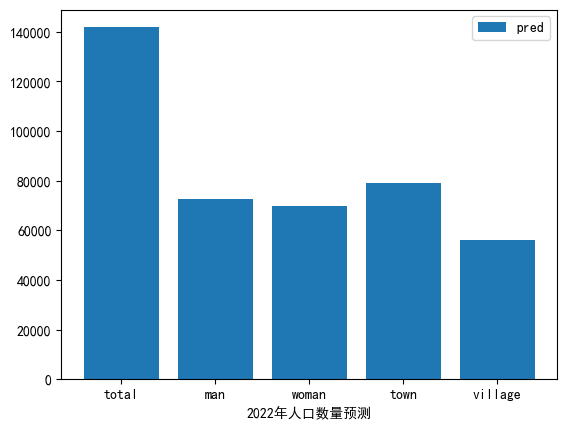

In [20]:
lei =['total','man','woman','town','village']
plt.rcParams['font.sans-serif'] = ['SimHei']#显示中文
plt.xlabel("2022年人口数量预测")
plt.bar(lei,pred,label='pred')
plt.legend()#t添加图例

待2022年准确数据公布可进行回测，本项目框架可进行房价、股票预测等，股票预测已进行小规模资金投入